In [1]:
from numpy import *
from scipy import *
import numpy as np
from matplotlib import *

from scipy import integrate
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import xlrd
import xlsxwriter

rc('text',usetex = True)
rc('font', family='serif',size = 12)

In [2]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
Eff = Data.sheet_by_name('Eff')


Effect = []

for i in range(7):
     Effect.append(array(Eff.col_values(i)))

phi = np.arange(0.1,2.01,0.1)
NTU = np.arange(50,351,50)
NN,PP = np.meshgrid(NTU,phi)
Effectiv = interpolate.interp2d(phi,NTU,Effect,kind = 'linear')

In [3]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Cold')

m_f_HEx_c   = array(HEx.col_values(0)) 
Ec_HEx_c   = array(HEx.col_values(1)) 
W_T_HEx_c   = array(HEx.col_values(2)) 
W_f_HEx_c   = array(HEx.col_values(3)) 
W_p_HEx_c   = array(HEx.col_values(4)) 

In [4]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Hot')

m_f_HEx_h   = array(HEx.col_values(0)) 
Ec_HEx_h   = array(HEx.col_values(1)) 
W_T_HEx_h   = array(HEx.col_values(2)) 
W_f_HEx_h   = array(HEx.col_values(3)) 
W_p_HEx_h   = array(HEx.col_values(4)) 

def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    for i in range(A,B):
        print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[C]) and ECr < Ec_HEx[i]:
            C = i
            #print('oic',C)
    for i in range(B,A,-1):
        print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[D]) and ECr > Ec_HEx[i]:
            D = i
            #print('oid',D)
    print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [5]:
def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    #print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    #print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    Ref_C = 1
    Ref_D = 0
    for i in range(A,B):
        #print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_C) and ECr < Ref_C:
            C = i
            Ref_C = Ec_HEx[i]
            #print('oic',C)
    for i in range(B,A,-1):
        #print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_D) and ECr > Ref_D:
            D = i
            Ref_D = Ec_HEx[i]
            #print('oid',D)
    #print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [6]:
def Radius(X): 
    R2,R3,B,L_m,L_r,h = X
    #return (1.41634776*(R2**-1.10684344)*(R3**2.08169412)*(B**0.74232364))
    #return((B/((0.7390256*R2**1.49668268*R3**-2.71694101)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.23379933))
    #return((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))
    A1 = ((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))
    #A2 = (B/((0.99497192*R2**1.55620764*R3**(-2.77937455))*np.exp(-0.92376442*(R3-R2)/L_m)*(h**0.08060702)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.1223844)
    A2 = (B/((1.71951251*R2**2.10853942*R3**(-3.7047729))*np.exp(-19.28562192/L_m)*(h**0.06469294)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.38270461)
    return(A2)

In [7]:
X = 101,131,1.36/1.41,150,110,25
Radius(X)

265.9757347183154

In [8]:
def MagField(X,a,b,c,d,e,f):
    R2,R3,R4,h,L,B_rem = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(h**f))

In [9]:
def MField(X,a,b,c,d,e):
    V_gap,V_mag,V_out,L,B_rem,R_4 = X
    return (a*(B_rem)*((V_gap/V_mag)**b)*(np.exp(c*R_4/L))*(np.tanh(d*(V_out/V_mag))+e))

In [10]:
def MField_2(X,a,b,c,d,e,f,g):
    R2,R3,R4,L,B_rem,R5 = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(np.tanh(f*(R5**2-R4**2)/(R4**2-R3**2))+g))

In [11]:
def Qc(X): 
    P1,P2,P3,P4,P5= X #Q_pas_CB,Q_act_CB,Q_span,W_mag,W_p  
    
    return(0.66353514*P1+0.93411209*P2-0.68368592*P3-4.41851655*P4-0.86193751*P5)

In [12]:
def Qh(X): 
    P1,P2,P3,P4,P5= X   
    
    return(0.82589533*P1+2.15709759*P2-0.88245005*P3-3.80613245*P4+0.05896191*P5)

def W_m(X):
    P1,P2,P3 = X
    #a = 0.00541105
    #a = 0.00937193
    a = 2.89392107e-03
    
    #b = -2.21029128
    #b = -0.99809109
    b = -3.14070133e+00
    
    #c = 2.84461382
    #c = 4.33008264
    c = 3.20699560e+00
    
    #d = 2.85861479
    #d = 1.61088792
    d = 3.81307556e+00
    
    return(a*P1**b*P2**c*P3**d )

In [13]:
def W_m(P1,P2,P3,m_s,f):
    
    a = -0.01328882   
    b =  0.68550508              
    c = 0.01008823               
    d = 0.68623025   
    e = 0.00555606    
    
    #a =  0.58240291
    #b = 0.94380341
    #c = -0.32271519  
    #d = 0.9438026 
    #e =  0.44126489
    
    return (m_s*f*P3*(a*P1**b+c*(P2)**d)*P3**e)

In [14]:
def W_Hex(X):
    P1,P2 = X
    return (a*P1**b + c*P2**d)

In [15]:
def Prop_param(X):
    T_c,T_h,B = X
    C_H = 1.65161038/100*T_c+2.59946197*T_h-1.14324309*100*B
    C_L = 10.16443738*T_c-5.32568341*T_h-0.71305997*B
    dT_mg = -0.01057708*T_c+0.01163704*T_h+1.73509682*B
    dT_dmg = -0.01229483*T_c+0.01376157*T_h+0.76454655*B
    CdT_mg = -9.517569*T_c+11.49711993*T_h+820.04168503*B
    CdT_dmg = 4.39480124*T_c-7.07931118/10*T_h+9.15928168*100*B
    return(C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg)

In [16]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx') #Import inputs File
Inputs = Data.sheet_by_name('Data') 

L   = array(Inputs.col_values(0)) #Import AMR Length [mm]
H   = array(Inputs.col_values(1)) #Import AMR Height [mm]
W   = array(Inputs.col_values(2)) #Import AMR Width [mm]
T_c = array(Inputs.col_values(3))+273.15 #Import temperature span [K]
T_h = array(Inputs.col_values(4))+273.15 #Import temperature span [K]
B   = array(Inputs.col_values(5)) #Import magnetic field [T]
f   = array(Inputs.col_values(6)) #Import frequency [Hz]
m_f = array(Inputs.col_values(7))/3600 #Import mass flow rate [kg/h]
Q_c = array(Inputs.col_values(8)) #Import Cooling capacity [W]
Q_h = array(Inputs.col_values(9)) #Import Rejected heat [W]
W_p = array(Inputs.col_values(10)) #Import Pumping power [W]
W_ma = array(Inputs.col_values(11)) #Import Magnetic power [W]
T_c_ml = array(Inputs.col_values(12))+273.15 #Import temperature span [K]
T_h_ml = array(Inputs.col_values(13))+273.15 #Import temperature span [K]


Calculation

In [17]:
def Optimal(m_f,FE,f,L,H,W,B,Tc,Th,Tce,The,L_xt,h_f):
    
    ##Properties of the solid 
    #rho_s = 7900  #[kg/m3] Density of the solid
    #k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

    ## Propertis of the fluid
    #rho_f = 1000  #[kg/m3] Density of the fluid
    #c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
    #Pr_f  = 6.136 #[-] Prandtl of the fluid
    #mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
    #k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

    ## Porous medium
    #d_p = 500*10**(-6) #[m] Particle diameter
   
    #Epsilon = 0.45 #0.55  #[-] Porosity
    #Epsilon_dp = 0.36 #0.465 #[-] Porosity
    d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
        
    #Magnetic Circuit
    #B_rem = 1.43
    #N_p = 2
    #N_Rp = 2
    
    ### CALCULATION ###
    
    #Porous medium
    

    N_reg = 4/FE
    
    #Regenerador Quadrad
    R2 = [W/2+t_w]/np.tan(np.pi/N_reg)-t_h
    R3 = np.sqrt((W/2)**2 + (R2+t_h+H)**2)+t_h
    
   
    
    #R_aux = np.sqrt((R2+t_h)**2-(W/2)**2)
    #R3 = np.sqrt((H+8+R_aux)**2+(W/2)**2)
    
    #Regenerador Circular
    
    #R_med = (4/FE)/(2*np.pi)*(W + 2*t_w)
    #R2 = R_med-(H/2+t_h)
    #R3 = R_med+(H/2+t_h)
    
    #A_st = H*W
    #A_aux_st = ((2*np.pi/(4/FE)-4*t_w/(R2+R3))/2)*((R3-t_h)**2-(R2+t_h)**2)
    A_aux_st = (np.pi/(4/FE))*((R3-t_h)**2-(R2+t_h)**2) - 2*t_w*((R3-t_h)-(R2+t_h))
    A_st = A_aux_st[0]
    
    #print(A_st)
    m_s   = L*A_st*10**-9*(1-Epsilon)*rho_s #mass of the AMR

    Beta = (1-Epsilon)*6/d_p*0.9
    v_s   = (m_f)/(rho_f*A_st*10**-6) #Superficial velocity

    #Dimensionless Numbers
    Re_dp = d_p*v_s*rho_f/(mu_f) #Reynolds number
    Nu = 2*(1+4*(1-Epsilon_dp)/Epsilon_dp)+((1-Epsilon_dp)**0.5)*Re_dp**0.6*Pr_f**(1/3) # Nusselt number
    Pe = Re_dp*Pr_f
    h_int = Nu*k_f/d_p
    NTU_f  = h_int*Beta*(L*A_st*10**(-9))/(m_f*c_f) 
    #print(Re_dp)
    dP = (L/1000)*(150*(1-Epsilon_dp)**2*mu_f*v_s/(Epsilon_dp**3*d_p**2) + 1.75*(1-Epsilon_dp)*rho_f*v_s**2/(Epsilon_dp**3*d_p))
    #print(dP/10**5)
    #dP = 0.5*413.11*(v_s*d_ph*rho_f/mu_f)**-0.514*rho_f*v_s**2*(L/1000)/d_ph
    #print(dP/dP_1)
    
    #Effective conduction
    #k_e_f = k_f*Epsilon #Fluid effective conduction

    #a_0 = exp(-1.084-6.778*(Epsilon-0.298))
    #f_0 = 0.8
    #k_e_s = k_f*((1-a_0)*(Epsilon*f_0+(1-Epsilon*f_0)*k_s/k_f)/(1-Epsilon*(1-f_0)+k_s/k_f*Epsilon*(1-f_0))+a_0*(2*((k_s/k_f)**2)*(1-Epsilon)+(1+2*Epsilon)*k_s/k_f)/((2+Epsilon)*k_s/k_f+(1-Epsilon))) #Solid effective conduction

    #D_ = (k_f*rho_f/c_f)*0.75*Pe/2

    #k_s_eff = k_e_s
    #k_f_eff = k_e_f + rho_f*c_f*D_
    
    ##### Properties Calculation ######   
    C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg = Prop_param((Tce,The,B))
    #print(C_L,C_H)

    ##### Porous media effectivness #####

    C_HB = ((m_f)*c_f)/(m_s*C_L*f)
    C_CB = ((m_f)*c_f)/(m_s*C_H*f)

    Efness_HB = Effectiv(C_HB/2,NTU_f)
    Efness_CB = Effectiv(C_CB/2,NTU_f)

    #print(Efness_HB,Efness_CB,h_int,Nu,v_s,Re_dp)


    ## Metrics ##
    Pi_4 = CdT_mg/CdT_dmg
    Pi_6 = ((m_f)*c_f)/(m_s*C_L*f)
    Pi_11 = ((m_f)*c_f)/(m_s*C_H*f)
    Pi_15 = (C_L-C_H)*(The-Tce)
    
    Q_pas_CB = Efness_CB*(The - Tce)*m_f*FE*c_f
    Q_act_CB = dT_mg*m_f*c_f*FE

    Q_pas_HB = Efness_HB*(The - Tce)*m_f*FE*c_f
    Q_act_HB = dT_dmg*m_f*c_f*FE

    Q_span = (The - Tce)*m_f*c_f*FE
    #Q_cond = ((1-Epsilon)*k_s_eff + Epsilon*k_f_eff)*(W*H*10**-6)*(The-Tce)/L
    W_mag  = m_s*f*(CdT_mg - CdT_dmg)
    #print(Pi_6,Pi_11,Pi_15,m_s,f,C_H)
    W_mag = W_m(Pi_6,Pi_11,Pi_15,m_s,f)
    W_pump = dP*m_f/rho_f*2*(FE)
    #print(Q_pas_CB,Q_pas_HB,Q_act_CB,Q_act_HB,Q_span,W_mag,W_pump)

    ######Calculation#######
    
    FL = (0.45238549*(1+L_xt)**3-2.34797947*(1+L_xt)**2 +4.06737728*(1+L_xt)-1.44601011)*R2**-0.14716104*R3**(0.15172723)
    #print( Qc((Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump)),W_pump)
    Qc_reg = Qc((Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump))*FL
    Qh_reg = Qh((Q_pas_HB,Q_act_HB,Q_span,W_mag,W_pump))*FL
    #print(Qc_reg,Qh_reg)
    #N_reg = Qc_target/Qc_reg
    Qc_target = Qc_reg*N_reg 
    Qh_target = Qh_reg*N_reg

    ECr_c = Qc_target/(FE*N_reg*m_f*c_f*(Tc-Tce))
    ECr_h = Qh_target/(FE*N_reg*m_f*c_f*(The-Th))
    
    B_rem = 1.43
    

    R4 = Radius((R2,R3,B/B_rem,L*(1+L_xt),L,h_f))
    

    
    #print(m_s,f,CdT_dmg,((Pi_6,Pi_4,Pi_11)))
    

    
    return (Qc_target,ECr_c,ECr_h,R4,R3,R2,W_mag,W_pump,Qh_target,L_xt,FL,dP)

In [63]:
m_f = np.arange(500,1195,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(3,4.1,1)
L = np.arange(90,111,10)
H = np.arange(37,46,2)
W = np.arange(59,72,2)
B_max = np.arange(1.35,1.45,0.03)
Tce = np.arange(14,16,2)
The = np.arange(43,45,2)
L_xt = np.arange(0.2,0.36,0.03)
d_par = np.arange(500*10**-6,501*10**-6,200*10**-6)
h_f = np.arange(30,31,5)
#d_par = [500*10**-6]

In [64]:
len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)*len(h_f)

5040

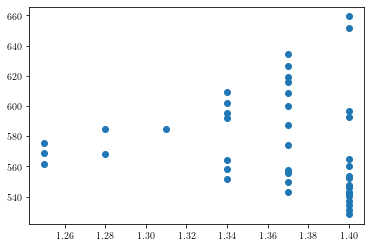

In [65]:
plt.plot(B_max_p,m_Rt_p,'o')

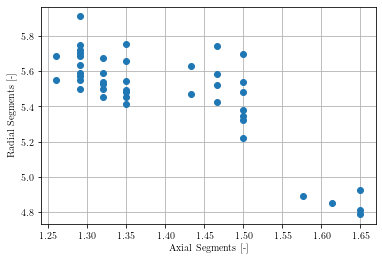

In [66]:
plt.plot((1+np.array(L_xt_p))*np.array(L_p)/90,(np.array(R4_p) - np.array(R3_p))/50,'o')

plt.grid()
plt.xlabel('Axial Segments [-]')
plt.ylabel('Radial Segments [-]')
#plt.ylim(1100,1300)
#plt.xlim(700,750)
plt.savefig('N_segments.png',format = 'png', dpi=500,bbox_inches='tight')

In [67]:
Q_c = []
cont = 0

T_c = 22
T_h = 35

Q_c_target = 3100

m_f_target = []
FE_target = []
f_target = []
L_target = []
H_target = []
W_target = []
Tce_target = []
The_target = []
ECr_c = []
ECr_h = []
R4 = []
R3 = []
R2 = []
W_mag = []
W_pump = []
B_target = []
Q_h = []
L_xt_target = []
FL_target = []
dp_target = []
hf_target = []
PD_target = []

##Properties of the solid 
rho_s = 7000  #[kg/m3] Density of the solid
k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

## Propertis of the fluid
rho_f = 1000  #[kg/m3] Density of the fluid
c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
Pr_f  = 6.136 #[-] Prandtl of the fluid
#mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
mu_f = 0.000835
k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

## Porous medium


#Magnetic Circuit
B_rem = 1.43
N_p = 2
N_Rp = 2

t_h = 3
t_w = 1.5

for i in range(size(FE)):
    for j in range(len(f)):
        for k in range(len(L)):
            for l in range(len(H)):
                for m in range(len(W)):
                    for n in range(len(Tce)):
                        for o in range(len(The)):
                            for p in range(len(B_max)):
                                for q in range(len(L_xt)):
                                    for r in range(len(d_par)):
                                        for s in range(len(h_f)):
                                            it = 0
                                            Q_c_system = 0

                                            d_p = d_par[r] #[m] Particle diameter

                                            Epsilon = 0.5 #0.55  #[-] Porosity
                                            Epsilon_ep = 0.25
                                            Epsilon_dp = Epsilon - Epsilon_ep #0.36 #0.465 #[-] Porosity
                                            d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
                                            
                                            while Q_c_system < Q_c_target and it < len(m_f):
                                                A,B,C,D,E,F,G,A1,A2,A3,A4,A5 = Optimal(m_f[it],FE[i],f[j],L[k],H[l],W[m],B_max[p],T_c+273.15,T_h+273.15,Tce[n]+273.15,The[o]+273.15,L_xt[q],h_f[s])
                                                Q_c_system = A[0]
                                                it = it + 1
                                                #print(A,B,C,D,E,F,G,A1,A2,A3)
                                                #print(m_f[it-1]*3600,Q_c_system )
                                            #print(Q_c_system)
                                            if Q_c_system > Q_c_target:
                                                Q_c.append(Q_c_system)
                                                m_f_target.append(3600*m_f[it-1])
                                                FE_target.append(FE[i])
                                                f_target.append(f[j])
                                                L_target.append(L[k])
                                                H_target.append(H[l])
                                                W_target.append(W[m])
                                                Tce_target.append(Tce[n])
                                                The_target.append(The[o])
                                                B_target.append(B_max[p])
                                                dp_target.append(d_p)
                                                hf_target.append(h_f[s])
                                                PD_target.append(A5)
                                                
                                                ECr_c.append(B[0])
                                                ECr_h.append(C[0])
                                                R4.append(D[0])
                                                R3.append(E[0])
                                                R2.append(F[0])
                                                W_mag.append(G)
                                                W_pump.append(A1)
                                                Q_h.append(A2[0])
                                                L_xt_target.append(A3)
                                                FL_target.append(A4)

                                            cont = cont+1
                                    print(100*cont/(len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)*len(h_f)))


0.01984126984126984
0.03968253968253968
0.05952380952380952
0.07936507936507936
0.0992063492063492
0.11904761904761904
0.1388888888888889
0.15873015873015872
0.17857142857142858
0.1984126984126984
0.21825396825396826
0.23809523809523808
0.25793650793650796
0.2777777777777778
0.2976190476190476
0.31746031746031744
0.3373015873015873
0.35714285714285715
0.376984126984127
0.3968253968253968
0.4166666666666667
0.4365079365079365
0.45634920634920634
0.47619047619047616
0.49603174603174605
0.5158730158730159
0.5357142857142857
0.5555555555555556
0.5753968253968254
0.5952380952380952
0.6150793650793651
0.6349206349206349
0.6547619047619048
0.6746031746031746
0.6944444444444444
0.7142857142857143
0.7341269841269841
0.753968253968254
0.7738095238095238
0.7936507936507936
0.8134920634920635
0.8333333333333334
0.8531746031746031
0.873015873015873
0.8928571428571429
0.9126984126984127
0.9325396825396826
0.9523809523809523
0.9722222222222222
0.9920634920634921
1.0119047619047619
1.0317460317460319


9.146825396825397
9.166666666666666
9.186507936507937
9.206349206349206
9.226190476190476
9.246031746031745
9.265873015873016
9.285714285714286
9.305555555555555
9.325396825396826
9.345238095238095
9.365079365079366
9.384920634920634
9.404761904761905
9.424603174603174
9.444444444444445
9.464285714285714
9.484126984126984
9.503968253968255
9.523809523809524
9.543650793650794
9.563492063492063
9.583333333333334
9.603174603174603
9.623015873015873
9.642857142857142
9.662698412698413
9.682539682539682
9.702380952380953
9.722222222222221
9.742063492063492
9.761904761904763
9.781746031746032
9.801587301587302
9.821428571428571
9.841269841269842
9.86111111111111
9.880952380952381
9.90079365079365
9.920634920634921
9.94047619047619
9.96031746031746
9.98015873015873
10.0
10.01984126984127
10.03968253968254
10.05952380952381
10.079365079365079
10.09920634920635
10.119047619047619
10.13888888888889
10.158730158730158
10.178571428571429
10.198412698412698
10.218253968253968
10.238095238095237
10.

18.055555555555557
18.075396825396826
18.095238095238095
18.115079365079364
18.134920634920636
18.154761904761905
18.174603174603174
18.194444444444443
18.214285714285715
18.234126984126984
18.253968253968253
18.273809523809526
18.293650793650794
18.313492063492063
18.333333333333332
18.353174603174605
18.373015873015873
18.392857142857142
18.41269841269841
18.432539682539684
18.452380952380953
18.47222222222222
18.49206349206349
18.511904761904763
18.53174603174603
18.5515873015873
18.571428571428573
18.591269841269842
18.61111111111111
18.63095238095238
18.650793650793652
18.67063492063492
18.69047619047619
18.71031746031746
18.73015873015873
18.75
18.76984126984127
18.78968253968254
18.80952380952381
18.82936507936508
18.849206349206348
18.86904761904762
18.88888888888889
18.908730158730158
18.928571428571427
18.9484126984127
18.96825396825397
18.988095238095237
19.00793650793651
19.02777777777778
19.047619047619047
19.067460317460316
19.08730158730159
19.107142857142858
19.12698412

27.123015873015873
27.142857142857142
27.16269841269841
27.182539682539684
27.202380952380953
27.22222222222222
27.24206349206349
27.261904761904763
27.28174603174603
27.3015873015873
27.321428571428573
27.341269841269842
27.36111111111111
27.38095238095238
27.400793650793652
27.42063492063492
27.44047619047619
27.46031746031746
27.48015873015873
27.5
27.51984126984127
27.53968253968254
27.55952380952381
27.57936507936508
27.599206349206348
27.61904761904762
27.63888888888889
27.658730158730158
27.678571428571427
27.6984126984127
27.71825396825397
27.738095238095237
27.75793650793651
27.77777777777778
27.797619047619047
27.817460317460316
27.83730158730159
27.857142857142858
27.876984126984127
27.896825396825395
27.916666666666668
27.936507936507937
27.956349206349206
27.976190476190474
27.996031746031747
28.015873015873016
28.035714285714285
28.055555555555557
28.075396825396826
28.095238095238095
28.115079365079364
28.134920634920636
28.154761904761905
28.174603174603174
28.194444444

36.17063492063492
36.19047619047619
36.21031746031746
36.23015873015873
36.25
36.26984126984127
36.28968253968254
36.30952380952381
36.32936507936508
36.34920634920635
36.36904761904762
36.388888888888886
36.40873015873016
36.42857142857143
36.448412698412696
36.46825396825397
36.48809523809524
36.507936507936506
36.52777777777778
36.54761904761905
36.567460317460316
36.58730158730159
36.607142857142854
36.62698412698413
36.6468253968254
36.666666666666664
36.68650793650794
36.70634920634921
36.726190476190474
36.74603174603175
36.76587301587302
36.785714285714285
36.80555555555556
36.82539682539682
36.845238095238095
36.86507936507937
36.88492063492063
36.904761904761905
36.92460317460318
36.94444444444444
36.964285714285715
36.98412698412698
37.00396825396825
37.023809523809526
37.04365079365079
37.06349206349206
37.083333333333336
37.1031746031746
37.12301587301587
37.142857142857146
37.16269841269841
37.182539682539684
37.20238095238095
37.22222222222222
37.242063492063494
37.26190

45.21825396825397
45.23809523809524
45.257936507936506
45.27777777777778
45.29761904761905
45.317460317460316
45.33730158730159
45.357142857142854
45.37698412698413
45.3968253968254
45.416666666666664
45.43650793650794
45.45634920634921
45.476190476190474
45.49603174603175
45.51587301587302
45.535714285714285
45.55555555555556
45.57539682539682
45.595238095238095
45.61507936507937
45.63492063492063
45.654761904761905
45.67460317460318
45.69444444444444
45.714285714285715
45.73412698412698
45.75396825396825
45.773809523809526
45.79365079365079
45.81349206349206
45.833333333333336
45.8531746031746
45.87301587301587
45.892857142857146
45.91269841269841
45.932539682539684
45.95238095238095
45.97222222222222
45.992063492063494
46.01190476190476
46.03174603174603
46.051587301587304
46.07142857142857
46.09126984126984
46.111111111111114
46.13095238095238
46.15079365079365
46.17063492063492
46.19047619047619
46.21031746031746
46.23015873015873
46.25
46.26984126984127
46.28968253968254
46.30952

54.36507936507937
54.38492063492063
54.404761904761905
54.42460317460318
54.44444444444444
54.464285714285715
54.48412698412698
54.50396825396825
54.523809523809526
54.54365079365079
54.56349206349206
54.583333333333336
54.6031746031746
54.62301587301587
54.642857142857146
54.66269841269841
54.682539682539684
54.70238095238095
54.72222222222222
54.742063492063494
54.76190476190476
54.78174603174603
54.801587301587304
54.82142857142857
54.84126984126984
54.861111111111114
54.88095238095238
54.90079365079365
54.92063492063492
54.94047619047619
54.96031746031746
54.98015873015873
55.0
55.01984126984127
55.03968253968254
55.05952380952381
55.07936507936508
55.09920634920635
55.11904761904762
55.138888888888886
55.15873015873016
55.17857142857143
55.198412698412696
55.21825396825397
55.23809523809524
55.257936507936506
55.27777777777778
55.29761904761905
55.317460317460316
55.33730158730159
55.357142857142854
55.37698412698413
55.3968253968254
55.416666666666664
55.43650793650794
55.4563492

63.51190476190476
63.53174603174603
63.551587301587304
63.57142857142857
63.59126984126984
63.611111111111114
63.63095238095238
63.65079365079365
63.67063492063492
63.69047619047619
63.71031746031746
63.73015873015873
63.75
63.76984126984127
63.78968253968254
63.80952380952381
63.82936507936508
63.84920634920635
63.86904761904762
63.888888888888886
63.90873015873016
63.92857142857143
63.948412698412696
63.96825396825397
63.98809523809524
64.0079365079365
64.02777777777777
64.04761904761905
64.06746031746032
64.08730158730158
64.10714285714286
64.12698412698413
64.14682539682539
64.16666666666667
64.18650793650794
64.2063492063492
64.22619047619048
64.24603174603175
64.26587301587301
64.28571428571429
64.30555555555556
64.32539682539682
64.3452380952381
64.36507936507937
64.38492063492063
64.4047619047619
64.42460317460318
64.44444444444444
64.46428571428571
64.48412698412699
64.50396825396825
64.52380952380952
64.5436507936508
64.56349206349206
64.58333333333333
64.60317460317461
64.62

72.7579365079365
72.77777777777777
72.79761904761905
72.81746031746032
72.83730158730158
72.85714285714286
72.87698412698413
72.89682539682539
72.91666666666667
72.93650793650794
72.9563492063492
72.97619047619048
72.99603174603175
73.01587301587301
73.03571428571429
73.05555555555556
73.07539682539682
73.0952380952381
73.11507936507937
73.13492063492063
73.1547619047619
73.17460317460318
73.19444444444444
73.21428571428571
73.23412698412699
73.25396825396825
73.27380952380952
73.2936507936508
73.31349206349206
73.33333333333333
73.35317460317461
73.37301587301587
73.39285714285714
73.41269841269842
73.43253968253968
73.45238095238095
73.47222222222223
73.4920634920635
73.51190476190476
73.53174603174604
73.5515873015873
73.57142857142857
73.59126984126983
73.61111111111111
73.63095238095238
73.65079365079364
73.67063492063492
73.69047619047619
73.71031746031746
73.73015873015873
73.75
73.76984126984127
73.78968253968254
73.80952380952381
73.82936507936508
73.84920634920636
73.86904761

82.00396825396825
82.02380952380952
82.0436507936508
82.06349206349206
82.08333333333333
82.10317460317461
82.12301587301587
82.14285714285714
82.16269841269842
82.18253968253968
82.20238095238095
82.22222222222223
82.2420634920635
82.26190476190476
82.28174603174604
82.3015873015873
82.32142857142857
82.34126984126983
82.36111111111111
82.38095238095238
82.40079365079364
82.42063492063492
82.44047619047619
82.46031746031746
82.48015873015873
82.5
82.51984126984127
82.53968253968254
82.55952380952381
82.57936507936508
82.59920634920636
82.61904761904762
82.63888888888889
82.65873015873017
82.67857142857143
82.6984126984127
82.71825396825396
82.73809523809524
82.7579365079365
82.77777777777777
82.79761904761905
82.81746031746032
82.83730158730158
82.85714285714286
82.87698412698413
82.89682539682539
82.91666666666667
82.93650793650794
82.9563492063492
82.97619047619048
82.99603174603175
83.01587301587301
83.03571428571429
83.05555555555556
83.07539682539682
83.0952380952381
83.115079365

91.32936507936508
91.34920634920636
91.36904761904762
91.38888888888889
91.40873015873017
91.42857142857143
91.4484126984127
91.46825396825396
91.48809523809524
91.5079365079365
91.52777777777777
91.54761904761905
91.56746031746032
91.58730158730158
91.60714285714286
91.62698412698413
91.64682539682539
91.66666666666667
91.68650793650794
91.7063492063492
91.72619047619048
91.74603174603175
91.76587301587301
91.78571428571429
91.80555555555556
91.82539682539682
91.8452380952381
91.86507936507937
91.88492063492063
91.9047619047619
91.92460317460318
91.94444444444444
91.96428571428571
91.98412698412699
92.00396825396825
92.02380952380952
92.0436507936508
92.06349206349206
92.08333333333333
92.10317460317461
92.12301587301587
92.14285714285714
92.16269841269842
92.18253968253968
92.20238095238095
92.22222222222223
92.2420634920635
92.26190476190476
92.28174603174604
92.3015873015873
92.32142857142857
92.34126984126983
92.36111111111111
92.38095238095238
92.40079365079364
92.42063492063492


In [68]:
N_circ_cold = 7
N_circ_hot = 7

W_FT_c = np.zeros(len(m_f_target))
W_Ff_c = np.zeros(len(m_f_target))
W_Fp_c = np.zeros(len(m_f_target))

W_FT_h = np.zeros(len(m_f_target))
W_Ff_h = np.zeros(len(m_f_target))
W_Fp_h = np.zeros(len(m_f_target))


for i in range(len(m_f_target)):
    print(i/len(m_f_target)*100)
    [W_FT_c[i],W_Ff_c[i],W_Fp_c[i]] = HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_target[i]/N_circ_cold,ECr_c[i])
    [W_FT_h[i],W_Ff_h[i],W_Fp_h[i]] = HEx_Power(m_f_HEx_h,W_T_HEx_h,W_f_HEx_h,W_p_HEx_h,Ec_HEx_h,4*m_f_target[i]/N_circ_hot,ECr_h[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_c[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_h[i])

0.0
0.031575623618566466
0.06315124723713293
0.0947268708556994
0.12630249447426586
0.15787811809283234
0.1894537417113988
0.22102936532996525
0.25260498894853173
0.2841806125670982
0.3157562361856647
0.34733185980423115
0.3789074834227976
0.4104831070413641
0.4420587306599305
0.47363435427849704
0.5052099778970635
0.5367856015156299
0.5683612251341964
0.5999368487527629
0.6315124723713293
0.6630880959898957
0.6946637196084623
0.7262393432270287
0.7578149668455952
0.7893905904641616
0.8209662140827282
0.8525418377012947
0.884117461319861
0.9156930849384275
0.9472687085569941
0.9788443321755604
1.010419955794127
1.0419955794126934
1.0735712030312599
1.1051468266498263
1.1367224502683928
1.1682980738869593
1.1998736975055257
1.2314493211240922
1.2630249447426587
1.2946005683612252
1.3261761919797914
1.3577518155983581
1.3893274392169246
1.420903062835491
1.4524786864540573
1.484054310072624
1.5156299336911905
1.5472055573097567
1.5787811809283232
1.61035680454689
1.6419324281654564
1.673

14.177455004736345
14.20903062835491
14.240606251973475
14.272181875592043
14.30375749921061
14.335333122829175
14.366908746447743
14.398484370066308
14.430059993684875
14.461635617303441
14.493211240922008
14.524786864540577
14.556362488159142
14.587938111777706
14.619513735396275
14.65108935901484
14.682664982633407
14.714240606251975
14.74581622987054
14.777391853489105
14.808967477107673
14.840543100726238
14.872118724344807
14.903694347963373
14.935269971581938
14.966845595200507
14.998421218819072
15.029996842437637
15.061572466056205
15.093148089674772
15.124723713293337
15.156299336911905
15.18787496053047
15.219450584149035
15.251026207767604
15.28260183138617
15.314177455004737
15.345753078623304
15.377328702241869
15.408904325860437
15.440479949479002
15.472055573097569
15.503631196716135
15.535206820334702
15.566782443953267
15.598358067571835
15.6299336911904
15.661509314808967
15.693084938427534
15.7246605620461
15.756236185664669
15.787811809283234
15.819387432901799
15.

28.228607514998423
28.26018313861699
28.291758762235553
28.32333438585412
28.35491000947269
28.38648563309125
28.41806125670982
28.449636880328388
28.48121250394695
28.512788127565518
28.544363751184086
28.57593937480265
28.60751499842122
28.639090622039788
28.67066624565835
28.702241869276918
28.733817492895486
28.765393116514048
28.796968740132616
28.828544363751185
28.86011998736975
28.891695610988315
28.923271234606883
28.95484685822545
28.986422481844016
29.017998105462585
29.049573729081153
29.081149352699715
29.112724976318283
29.14430059993685
29.175876223555413
29.20745184717398
29.23902747079255
29.27060309441111
29.30217871802968
29.33375434164825
29.365329965266813
29.39690558888538
29.42848121250395
29.46005683612251
29.49163245974108
29.52320808335965
29.55478370697821
29.58635933059678
29.617934954215347
29.649510577833908
29.681086201452477
29.712661825071045
29.744237448689614
29.77581307230818
29.807388695926747
29.838964319545312
29.870539943163877
29.902115566782445

42.53236501420903
42.5639406378276
42.595516261446164
42.62709188506473
42.658667508683294
42.690243132301866
42.72181875592043
42.753394379538996
42.78497000315756
42.81654562677613
42.84812125039469
42.87969687401326
42.91127249763183
42.94284812125039
42.974423744868965
43.00599936848753
43.037574992106094
43.06915061572466
43.10072623934323
43.13230186296179
43.16387748658036
43.195453110198926
43.22702873381749
43.258604357436056
43.29017998105463
43.32175560467319
43.35333122829176
43.38490685191033
43.41648247552889
43.44805809914746
43.479633722766025
43.51120934638459
43.542784970003154
43.574360593621726
43.60593621724029
43.637511840858856
43.66908746447742
43.70066308809599
43.73223871171456
43.76381433533312
43.79538995895169
43.82696558257025
43.858541206188825
43.89011682980739
43.921692453425955
43.95326807704452
43.98484370066309
44.01641932428165
44.04799494790022
44.079570571518786
44.11114619513735
44.14272181875592
44.17429744237449
44.20587306599305
44.23744868961

56.83612251341964
56.867698137038204
56.899273760656776
56.93084938427534
56.9624250078939
56.99400063151248
57.025576255131035
57.0571518787496
57.08872750236817
57.12030312598674
57.1518787496053
57.183454373223874
57.21502999684244
57.246605620461
57.278181244079576
57.309756867698134
57.3413324913167
57.37290811493527
57.404483738553836
57.4360593621724
57.46763498579097
57.49921060940954
57.530786233028095
57.562361856646675
57.59393748026523
57.6255131038838
57.65708872750237
57.688664351120934
57.7202399747395
57.75181559835807
57.78339122197663
57.81496684559521
57.846542469213766
57.87811809283233
57.9096937164509
57.94126934006947
57.97284496368803
58.004420587306605
58.03599621092517
58.06757183454373
58.09914745816231
58.130723081780864
58.16229870539943
58.193874329018
58.225449952636566
58.25702557625513
58.2886011998737
58.32017682349226
58.351752447110826
58.3833280707294
58.41490369434796
58.44647931796653
58.4780549415851
58.509630565203665
58.54120618882222
58.572781

71.32933375434165
71.36090937796021
71.39248500157878
71.42406062519736
71.4556362488159
71.48721187243447
71.51878749605305
71.55036311967162
71.58193874329018
71.61351436690875
71.64508999052731
71.67666561414589
71.70824123776444
71.739816861383
71.77139248500158
71.80296810862015
71.83454373223871
71.86611935585728
71.89769497947584
71.92927060309441
71.96084622671299
71.99242185033154
72.0239974739501
72.05557309756868
72.08714872118725
72.11872434480581
72.15029996842438
72.18187559204294
72.21345121566151
72.24502683928009
72.27660246289864
72.3081780865172
72.33975371013578
72.37132933375435
72.40290495737291
72.43448058099148
72.46605620461004
72.4976318282286
72.52920745184717
72.56078307546574
72.5923586990843
72.62393432270288
72.65550994632144
72.68708556994
72.71866119355857
72.75023681717714
72.7818124407957
72.81338806441427
72.84496368803283
72.8765393116514
72.90811493526998
72.93969055888854
72.9712661825071
73.00284180612567
73.03441742974424
73.0659930533628
73.097

85.98042311335648
86.01199873697506
86.04357436059362
86.07514998421219
86.10672560783075
86.13830123144932
86.16987685506788
86.20145247868646
86.23302810230501
86.26460372592358
86.29617934954216
86.32775497316072
86.35933059677929
86.39090622039785
86.42248184401642
86.45405746763498
86.48563309125356
86.51720871487211
86.54878433849068
86.58035996210926
86.61193558572782
86.64351120934639
86.67508683296495
86.70666245658352
86.73823808020208
86.76981370382066
86.80138932743921
86.83296495105778
86.86454057467635
86.89611619829492
86.92769182191348
86.95926744553205
86.99084306915061
87.02241869276918
87.05399431638774
87.08556994000631
87.11714556362489
87.14872118724345
87.18029681086202
87.21187243448058
87.24344805809915
87.27502368171771
87.30659930533629
87.33817492895484
87.36975055257341
87.40132617619199
87.43290179981055
87.46447742342912
87.49605304704768
87.52762867066625
87.55920429428481
87.59077991790338
87.62235554152194
87.6539311651405
87.68550678875908
87.71708241

In [69]:
W_p_valve = (2*np.array(m_f_target)/4/1000)**2*10**5**(2*np.array(m_f_target)/3600)/1000*4/np.array(FE_target)
W_valve   = 8*16

In [70]:
m_La = (np.pi*((np.array(R3)-t_h)**2-(np.array(R2)+t_h)**2)- 16*(2*t_w)*((np.array(R3)-t_h)-(np.array(R2)+t_h)))*np.array(L_target)*(1-Epsilon)*7000*10**-9
m_Rt = np.pi*((np.array(R4))**2-np.array(R3)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_St = np.pi*((np.array(R2)**2))*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500
m_Fe = np.pi*((np.array(R4)+hf_target)**2-np.array(R4)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_Nd = m_Rt + m_St + m_Fe
m_w  = (4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(Epsilon_dp)*1000*10**-9)

In [71]:
m_T = m_La + m_Rt + m_St + m_Fe + m_w
W_T = W_Ff_c + W_Ff_h + W_Fp_c + W_Fp_h +np.array(W_mag)*16 + np.array(W_pump)*16+ W_valve + W_p_valve

In [72]:
m_p = []
W_pa =[]

m_Nd_p = []
m_Rt_p = []
m_La_p = []
m_w_p = []

W_p_CHEx_p = []
W_p_CHEx_f = []
W_p_HHEx_p = []
W_p_HHEx_f = []
W_p_mag = []
W_p_pump = []
W_pa_valve = []
W_pa_p_valve = []


m_f_p = []
FE_p  =[]
f_p = []
L_p = []
H_p = []
W_p = []
B_max_p = []
Tce_p = []
The_p = []
dp_p = []
ECrc_p = []
ECrh_p = []
Qh_p = []
PD_p = []

R2_p = []
R3_p = []
R4_p = []
hf_p = []
L_xt_p = []


for i in range(len(m_T)):
    print(i/len(m_T))
    A = 0
    for j in  range(len(m_T)):
        #if (m_T[i] >= m_T[j] and W_T[i] > W_T[j]) or (m_T[i] > m_T[j] and W_T[i] >= W_T[j]):
        if (m_Rt[i] >= m_Rt[j] and W_T[i] > W_T[j]) or (m_Rt[i] > m_Rt[j] and W_T[i] >= W_T[j]):
            A = 1
    if A == 0 :
        #print(m_T[i],W_T[i])
        m_p.append(m_T[i])
        m_Nd_p.append(m_Nd[i])
        m_Rt_p.append(m_Rt[i])
        m_La_p.append(m_La[i])
        m_w_p.append(m_w[i])
        
        m_f_p.append(m_f_target[i])
        FE_p.append(FE_target[i])
        f_p.append(f_target[i])
        L_p.append(L_target[i])
        H_p.append(H_target[i])
        W_p.append(W_target[i])
        B_max_p.append(B_target[i])
        Tce_p.append(Tce_target[i])
        The_p.append(The_target[i])
        dp_p.append(dp_target[i])
        PD_p.append(PD_target[i])
        
        ECrc_p.append(ECr_c[i])
        ECrh_p.append(ECr_h[i])
        Qh_p.append(Q_h[i])
        
        R2_p.append(R2[i])
        R3_p.append(R3[i])
        R4_p.append(R4[i])
        L_xt_p.append(L_xt_target[i])
        hf_p.append(hf_target[i])
        #A = Optimal(m_f_target[i]/3600,FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        #print(A[0],m_f_target[i],FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        
        W_pa.append(W_T[i])
        W_p_CHEx_p.append(W_Fp_c[i])
        W_p_CHEx_f.append(W_Ff_c[i])
        W_p_HHEx_p.append(W_Fp_h[i])
        W_p_HHEx_f.append(W_Ff_h[i])
        W_p_mag.append(np.array(W_mag[i])*4/np.array(FE_target[i]))
        W_p_pump.append(np.array(W_pump[i])*4/np.array(FE_target[i]))
        W_pa_valve.append(W_valve)
        W_pa_p_valve.append(W_p_valve[i])   

0.0
0.00031575623618566466
0.0006315124723713293
0.000947268708556994
0.0012630249447426586
0.0015787811809283233
0.001894537417113988
0.0022102936532996525
0.0025260498894853173
0.002841806125670982
0.0031575623618566467
0.0034733185980423114
0.003789074834227976
0.004104831070413641
0.004420587306599305
0.00473634354278497
0.0050520997789706345
0.0053678560151563
0.005683612251341964
0.005999368487527629
0.006315124723713293
0.006630880959898958
0.006946637196084623
0.007262393432270287
0.007578149668455952
0.007893905904641616
0.008209662140827282
0.008525418377012947
0.00884117461319861
0.009156930849384275
0.00947268708556994
0.009788443321755604
0.010104199557941269
0.010419955794126934
0.0107357120303126
0.011051468266498263
0.011367224502683928
0.011682980738869593
0.011998736975055258
0.012314493211240922
0.012630249447426587
0.012946005683612252
0.013261761919797915
0.01357751815598358
0.013893274392169246
0.01420903062835491
0.014524786864540574
0.01484054310072624
0.0151562

0.13703820650457846
0.13735396274076414
0.1376697189769498
0.13798547521313545
0.13830123144932113
0.1386169876855068
0.13893274392169244
0.13924850015787812
0.13956425639406378
0.13988001263024943
0.14019576886643512
0.14051152510262077
0.14082728133880645
0.1411430375749921
0.14145879381117776
0.14177455004736345
0.1420903062835491
0.14240606251973476
0.14272181875592044
0.1430375749921061
0.14335333122829175
0.14366908746447743
0.14398484370066308
0.14430059993684874
0.14461635617303442
0.14493211240922008
0.14524786864540576
0.1455636248815914
0.14587938111777707
0.14619513735396275
0.1465108935901484
0.14682664982633406
0.14714240606251974
0.1474581622987054
0.14777391853489105
0.14808967477107673
0.1484054310072624
0.14872118724344807
0.14903694347963373
0.14935269971581938
0.14966845595200506
0.14998421218819072
0.15029996842437637
0.15061572466056206
0.1509314808967477
0.15124723713293337
0.15156299336911905
0.1518787496053047
0.15219450584149036
0.15251026207767604
0.152826018

0.2851278812756552
0.2854436375118409
0.2857593937480265
0.2860751499842122
0.28639090622039787
0.2867066624565835
0.2870224186927692
0.28733817492895486
0.2876539311651405
0.28796968740132617
0.28828544363751185
0.2886011998736975
0.28891695610988316
0.28923271234606884
0.2895484685822545
0.28986422481844015
0.29017998105462584
0.2904957372908115
0.29081149352699714
0.2911272497631828
0.2914430059993685
0.29175876223555414
0.2920745184717398
0.2923902747079255
0.29270603094411113
0.2930217871802968
0.2933375434164825
0.2936532996526681
0.2939690558888538
0.2942848121250395
0.2946005683612251
0.2949163245974108
0.2952320808335965
0.2955478370697821
0.2958635933059678
0.29617934954215347
0.2964951057783391
0.2968108620145248
0.29712661825071046
0.29744237448689614
0.29775813072308177
0.29807388695926745
0.29838964319545314
0.29870539943163876
0.29902115566782445
0.29933691190401013
0.29965266814019575
0.29996842437638144
0.3002841806125671
0.30059993684875275
0.30091569308493843
0.30123

0.420903062835491
0.4212188190716767
0.4215345753078623
0.421850331544048
0.4221660877802337
0.4224818440164193
0.422797600252605
0.42311335648879067
0.4234291127249763
0.423744868961162
0.42406062519734766
0.4243763814335333
0.42469213766971897
0.42500789390590465
0.4253236501420903
0.42563940637827596
0.42595516261446165
0.4262709188506473
0.42658667508683296
0.42690243132301864
0.4272181875592043
0.42753394379538995
0.42784970003157563
0.4281654562677613
0.42848121250394694
0.4287969687401326
0.4291127249763183
0.42942848121250393
0.4297442374486896
0.4300599936848753
0.4303757499210609
0.4306915061572466
0.4310072623934323
0.4313230186296179
0.4316387748658036
0.4319545311019893
0.4322702873381749
0.4325860435743606
0.4329017998105463
0.4332175560467319
0.4335333122829176
0.43384906851910326
0.4341648247552889
0.4344805809914746
0.43479633722766026
0.4351120934638459
0.43542784970003157
0.43574360593621725
0.43605936217240293
0.43637511840858856
0.43669087464477424
0.43700663088095

0.6236185664666877
0.6239343227028734
0.624250078939059
0.6245658351752447
0.6248815914114304
0.625197347647616
0.6255131038838017
0.6258288601199874
0.626144616356173
0.6264603725923586
0.6267761288285444
0.62709188506473
0.6274076413009156
0.6277233975371014
0.628039153773287
0.6283549100094726
0.6286706662456584
0.628986422481844
0.6293021787180296
0.6296179349542154
0.629933691190401
0.6302494474265867
0.6305652036627724
0.630880959898958
0.6311967161351437
0.6315124723713293
0.631828228607515
0.6321439848437007
0.6324597410798863
0.632775497316072
0.6330912535522577
0.6334070097884433
0.633722766024629
0.6340385222608147
0.6343542784970003
0.634670034733186
0.6349857909693717
0.6353015472055573
0.6356173034417429
0.6359330596779287
0.6362488159141143
0.6365645721502999
0.6368803283864857
0.6371960846226713
0.6375118408588569
0.6378275970950427
0.6381433533312283
0.6384591095674139
0.6387748658035997
0.6390906220397853
0.6394063782759709
0.6397221345121566
0.6400378907483423
0.6403

0.7739185348910641
0.7742342911272497
0.7745500473634355
0.7748658035996211
0.7751815598358067
0.7754973160719925
0.7758130723081781
0.7761288285443637
0.7764445847805495
0.7767603410167351
0.7770760972529207
0.7773918534891064
0.7777076097252921
0.7780233659614777
0.7783391221976634
0.7786548784338491
0.7789706346700347
0.7792863909062204
0.779602147142406
0.7799179033785917
0.7802336596147774
0.780549415850963
0.7808651720871487
0.7811809283233344
0.78149668455952
0.7818124407957057
0.7821281970318914
0.782443953268077
0.7827597095042627
0.7830754657404484
0.783391221976634
0.7837069782128196
0.7840227344490054
0.784338490685191
0.7846542469213768
0.7849700031575624
0.785285759393748
0.7856015156299337
0.7859172718661194
0.786233028102305
0.7865487843384907
0.7868645405746764
0.787180296810862
0.7874960530470477
0.7878118092832334
0.788127565519419
0.7884433217556047
0.7887590779917903
0.789074834227976
0.7893905904641617
0.7897063467003473
0.790022102936533
0.7903378591727187
0.7906

0.9640037890748342
0.9643195453110199
0.9646353015472056
0.9649510577833912
0.9652668140195769
0.9655825702557626
0.9658983264919482
0.9662140827281339
0.9665298389643195
0.9668455952005052
0.9671613514366909
0.9674771076728765
0.9677928639090622
0.9681086201452479
0.9684243763814335
0.9687401326176192
0.9690558888538049
0.9693716450899905
0.9696874013261761
0.9700031575623619
0.9703189137985475
0.9706346700347331
0.9709504262709189
0.9712661825071045
0.9715819387432901
0.9718976949794759
0.9722134512156615
0.9725292074518471
0.9728449636880329
0.9731607199242185
0.9734764761604041
0.9737922323965899
0.9741079886327755
0.9744237448689612
0.9747395011051468
0.9750552573413325
0.9753710135775182
0.9756867698137038
0.9760025260498895
0.9763182822860752
0.9766340385222608
0.9769497947584465
0.9772655509946322
0.9775813072308178
0.9778970634670034
0.9782128197031892
0.9785285759393748
0.9788443321755604
0.9791600884117462
0.9794758446479318
0.9797916008841174
0.9801073571203032
0.9804231133

In [73]:
Name = str(f[0])+'Hz-dp=' + str(d_par[0])+'mm'+ str(L[0])+'mm'
Name + '.xlsx'

'3.0Hz-dp=0.0005mm90mm.xlsx'

In [74]:
workbook = xlsxwriter.Workbook(Name + '.xlsx')
Data = workbook.add_worksheet(Name)

for i in range(len(m_f_p)):
    Data.write(i,0,m_f_p[i]) 
    Data.write(i,1,FE_p[i])
    Data.write(i,2,f_p[i])
    Data.write(i,3,L_p[i])
    Data.write(i,4,H_p[i])
    Data.write(i,5,W_p[i]) 
    Data.write(i,6,B_max_p[i])
    Data.write(i,7,Tce_p[i])
    Data.write(i,8,The_p[i])
    Data.write(i,9,m_p[i])
    Data.write(i,10,m_Nd_p[i])
    Data.write(i,11,m_La_p[i])
    Data.write(i,12,m_w_p[i])
    Data.write(i,13,W_pa[i])
    Data.write(i,14,W_p_CHEx_p[i])
    Data.write(i,15,W_p_CHEx_f[i])
    Data.write(i,16,W_p_HHEx_p[i])
    Data.write(i,17,W_p_HHEx_f[i])
    Data.write(i,18,W_p_mag[i])
    Data.write(i,19,W_p_pump[i])
    Data.write(i,20,R2_p[i])
    Data.write(i,21,R3_p[i])
    Data.write(i,22,R4_p[i])
    Data.write(i,23,L_xt_p[i])
    Data.write(i,24,hf_p[i])
    Data.write(i,25,ECrc_p[i])
    Data.write(i,26,ECrh_p[i])
    Data.write(i,27,Qh_p[i])
    Data.write(i,28,m_Rt_p[i])
    Data.write(i,29,PD_p[i])
    
workbook.close()

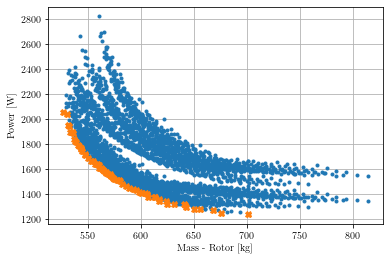

In [75]:
plt.plot(m_Rt,W_T,'.')
plt.plot(m_Rt_p,W_pa,'X')
plt.xlabel('Mass - Rotor [kg]')
plt.ylabel('Power [W]')
plt.grid()
#plt.ylim(1100,1300)
#plt.xlim(700,750)
plt.savefig('Optimum_Rotor.png',format = 'png', dpi=500,bbox_inches='tight')

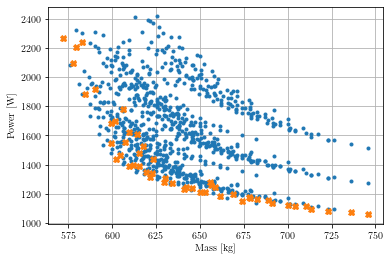

In [111]:
plt.plot(m_T,W_T,'.')
plt.plot(m_p,W_pa,'X')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
#plt.ylim(1100,1300)
#plt.xlim(700,750)
plt.savefig('Optimum_System.png',format = 'png', dpi=500,bbox_inches='tight')

In [88]:
m_30 = m_p
m_Rt_30 = m_Rt_p
W_30 = W_pa

In [89]:
plt.plot(m_15,m_Rt_15,'X', label = '15')
plt.plot(m_30,m_Rt_30,'X', label = '25')
#plt.plot(m_35,m_Rt_35,'X', label = '35')
plt.plot(m_45,m_Rt_45,'X', label = '45')
plt.legend()

NameError: name 'm_15' is not defined

In [ ]:
W_p_pump*0.9

In [ ]:
#plt.plot(m_T,m_La,'.')
plt.plot(R3_p,m_p,'X')

In [ ]:
plt.plot(R4_p,m_p,'x')

In [224]:
Q_c_new = [[] for i in range(len(m_p))]
m_flow_new = [[] for i in range(len(m_p))]


for i in range(len(m_p)):
    m_flow = np.arange(m_f_p[i]+5,1200,5)
    #print(m_f_p[i])
    for j in range(len(m_flow)):
        A = Optimal(m_flow[j]/3600,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i]+273.15,The_p[i]+273.15,L_xt_p[i],hf_p[i])
        #print(m_flow[j],A[0],i,j,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i],The_p[i],L_xt_p[i])
        Q_c_new[i].append(A[0])
        m_flow_new[i].append(m_flow[j])

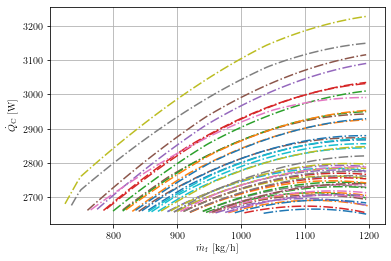

In [225]:
for i in range(len(m_p)):
    plt.plot(m_flow_new[i],Q_c_new[i],'-.')
#plt.ylim(2900,4700)
plt.grid()
#plt.legend()
plt.xlabel(r'$\dot{m}_\mathrm{f}$ [kg/h]')
plt.ylabel(r'$\dot{Q}_\mathrm{C}$ [W]')
plt.savefig('Extra.png',format = 'png', dpi=1000,bbox_inches='tight')

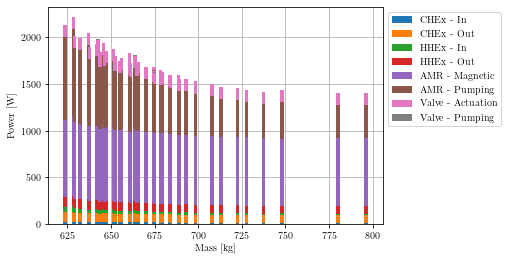

In [229]:
width = 2
plt.grid(zorder = 0)
plt.bar(m_p,W_p_CHEx_p, width, label = 'CHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = W_p_CHEx_p, label = 'CHEx - Out',zorder = 3)
plt.bar(m_p,W_p_HHEx_p, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f), label = 'HHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p), label = 'HHEx - Out',zorder = 3)
plt.bar(m_p,W_p_mag, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f), label = 'AMR - Magnetic',zorder = 3)
plt.bar(m_p,W_p_pump, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) , label = 'AMR - Pumping',zorder = 3)
plt.bar(m_p,W_pa_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f) + np.array(W_p_mag) + np.array(W_p_pump) , label = 'Valve - Actuation',zorder = 3)
plt.bar(m_p,W_pa_p_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) + np.array(W_p_pump)+ np.array(W_pa_valve), label = 'Valve - Pumping',zorder = 3)

#plt.ylim([0,3000])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend(bbox_to_anchor = (1,1))
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [230]:
m_La_p = np.pi*(np.array(R3_p)**2-np.array(R2_p)**2)*np.array(L_p)*(1-Epsilon)*7000*10**-9
m_Rt_p = np.pi*((np.array(R4_p))**2-np.array(R3_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2
m_St_p = np.pi*((np.array(R2_p)**2))*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500
m_Fe_p = np.pi*((np.array(R4_p)+np.array(hf_p))**2-np.array(R4_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 


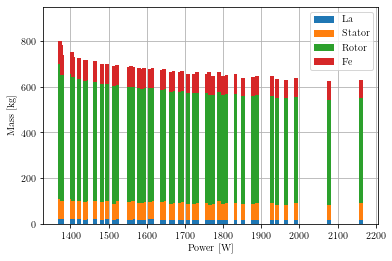

In [236]:
width = 10
plt.grid(zorder = 0)
plt.bar(W_pa,m_La_p, width, label = 'La',zorder = 3)
plt.bar(W_pa,m_St_p, width,bottom = m_La_p, label = 'Stator',zorder = 3)
plt.bar(W_pa,m_Rt_p, width,bottom = np.array(m_La_p) + np.array(m_St_p), label = 'Rotor',zorder = 3)
plt.bar(W_pa,m_Fe_p, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p), label = 'Fe',zorder = 3)
#plt.bar(W_pa,m_Fe_p_80, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20)+ np.array(m_Fe_p_40), label = 'Fe (80 mm)',zorder = 3)
plt.legend( bbox_to_anchor=[1, 1])
plt.ylabel('Mass [kg]')
plt.xlabel('Power [W]')
plt.ylim(0,950)
#plt.ylim(0,1050)
plt.savefig('Mass_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')